## Download TO 

In [1]:
from bs4 import BeautifulSoup
import urllib
import wget
import re
from robobrowser import RoboBrowser
import pandas as pd
import datetime
import astropy.time as astime
import matplotlib
import numpy as np
#matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

In [2]:
all_TO_catalogue_url = 'http://nesssi.cacr.caltech.edu/catalina/CRTSII_Allupdate.html'
SN_CSS_URL = 'http://nesssi.cacr.caltech.edu/catalina/AllSN.arch.html'
CV_CSS_URL = 'http://nesssi.cacr.caltech.edu/catalina/AllCV.arch.html'
BZ_CSS_URL = 'http://nesssi.cacr.caltech.edu/catalina/AllBlaz.arch.html'
AST_CSS_URL = 'http://nesssi.cacr.caltech.edu/catalina/CRTSII_Ast.html' #tabla diferente!
AGN_CSS_URL = 'http://nesssi.cacr.caltech.edu/catalina/AllAGN.arch.html'
OTHER_CSS_URL = 'http://nesssi.cacr.caltech.edu/catalina/AllOth.arch.html'
ALL_TO_list = [SN_CSS_URL, CV_CSS_URL, BZ_CSS_URL, AGN_CSS_URL, OTHER_CSS_URL]

In [3]:
#function that gets the LC points given an url
#url_LC is a string
def original_get_LC_points(url_LC):
    aux_LC = urllib.request.urlopen(url_LC).read()
    soup_LC = BeautifulSoup(aux_LC, "lxml")
    #each point has a tag <area
    area_rows = soup_LC.find_all("area")
    LC_x_list = []
    LC_y_list = []
    for aux in area_rows:
        #onmouse over is the key that has the (x,y) points
        list_str_points = aux['onmouseover'].split()
        #position 0 has the x value
        complete_x = list_str_points[0]
        x_value = complete_x[complete_x.find("('")+2:]
        #change from mjd 
        x_year = astime.Time(float(x_value) + 53249, format='mjd')
        x_decimal_year = x_year.decimalyear
        LC_x_list.append(x_decimal_year)
        #position 2 has the y value
        complete_y = list_str_points[2]
        y_value = complete_y[complete_y.find("('")+2:complete_y.find("')")]
        LC_y_list.append(float(y_value))
    LC_array = np.array([LC_x_list, LC_y_list])
    LC_array = LC_array.T
    return LC_array

In [4]:
def get_LC_points(url_LC):
    aux_LC = urllib.request.urlopen(url_LC).read()
    soup_LC = BeautifulSoup(aux_LC, "lxml")
    #each point has a tag <area
    area_rows = soup_LC.find_all("area")
    LC_x_list = []
    LC_y_list = []
    for aux in area_rows:
        #onmouse over is the key that has the (x,y) points
        list_str_points = aux['onmouseover'].split()
        #position 0 has the x value
        complete_x = list_str_points[0]
        x_value = complete_x[complete_x.find("('")+2:]
        #change from mjd 
        x_year = astime.Time(float(x_value) + 53249, format='mjd')
        x_decimal_year = x_year.decimalyear
        LC_x_list.append(x_decimal_year)
        #position 2 has the y value
        complete_y = list_str_points[2]
        y_value = complete_y[complete_y.find("('")+2:complete_y.find("')")]
        LC_y_list.append(float(y_value))
    if min(LC_x_list) >= 2012:
        in_or_out=0
    else:
        in_or_out=1
    #LC_array = np.array([LC_x_list, LC_y_list])
    #LC_array = LC_array.T
    #return LC_array
    return in_or_out

## Iterate over all the catalogues

In [24]:
def get_all_TO(TO_url):
    aux_soup_TO = urllib.request.urlopen(TO_url).read()
    soup_all_catalogue = BeautifulSoup(aux_soup_TO, "lxml")
    rows = soup_all_catalogue.find_all("tr") #each row is an object
    url_LC_list =[]
    object_id_list = []
    ra_object_list = []
    dec_object_list = []
    mag_object_list = []
    type_object_list = []
    error_mag_list = []
    #iterate over all the TO within each type
    for index in rows:
        #extract the contents of each row
        list_each_row = list(index.contents)
        #extract url
        #print(list_each_row)
        string_url = str(list_each_row[10]) #element number 11 has the url of the LC
        start =string_url.find('http')
        end = string_url.find('.html',start)
        string_url = string_url[start:end+5]
        url_LC_list.append(string_url)
        #extract object id
        object_id_list.append(list_each_row[0].getText()[0:-1])
        #extract RA
        ra_object_list.append(list_each_row[1].getText())
        #extract DEC
        dec_object_list.append(list_each_row[2].getText())
        #extract magnitude
        #mag_object_list.append(list_each_row[4].getText())
        mag_object_list.append(list_each_row[3].getText())
        #extract magnitude error
        error_mag_list.append(list_each_row[4].getText())
        #extract object type
        #type_object_list.append(list_each_row[9].getText()) 
        type_object_list.append(list_each_row[12].getText()) 
    data = {'CRTS ID' : object_id_list[1:], ra_object_list[0] : ra_object_list[1:], 
        dec_object_list[0][0:3] : dec_object_list[1:], mag_object_list[0] :mag_object_list[1:], 
       type_object_list[0] : type_object_list[1:], 'URL LC' : url_LC_list[1:], 'Mag ER': error_mag_list[1:]}
    df_all_objects = pd.DataFrame(data)
    return df_all_objects        
    

In [25]:
df_SN = get_all_TO(ALL_TO_list[2])

IndexError: list index out of range

In [20]:
df_SN.head()

,CRTS ID,Dec,FC,Mag,Mag ER,RA (J2000),URL LC
0,CSS161109:093032+203629,20.60814,yes,18.44,2.36,142.63453,
1,CSS161109:035036+135451,13.91412,yes,17.51,-1.51,57.65194,
2,CSS161108:092517+553459,55.58309,yes,17.96,-3.46,141.31900,
3,CSS161107:012407+231107,23.18541,yes,19.75,2.25,21.02794,
4,CSS161106:004134+202046,20.34622,yes,19.58,1.82,10.39148,


## Append the light curve for each object

In [ ]:
df_all_objects = df_SN
for it, rows_df in df_all_objects.iterrows():
    list_LC_2012 = get_LC_points(rows_df['URL LC'])
    #df_all_objects.append({'LC array': LC_data}, ignore_index=True)

In [ ]:
df_all_objects['Dec']

In [130]:
#aux_TO = urllib.request.urlopen(all_TO_catalogue_url).read()
aux_TO = urllib.request.urlopen(BZ_CSS_URL).read()
soup_all_catalogue = BeautifulSoup(aux_TO, "lxml")
rows = soup_all_catalogue.find_all("tr") #each row is an object
link_LC = soup_all_catalogue.find_all("td")
print(type(rows))

<class 'bs4.element.ResultSet'>


In [133]:
fo = rows[25]
list_aux = list(fo.contents)
print(list_aux[3].getText()[0:-1])
aux = fo.getText().strip().split()
#print(aux[2])
#print(type(aux))
#print(df_all_objects.shape[0])

18.1


In [134]:
url_LC_list =[]
object_id_list = []
ra_object_list = []
dec_object_list = []
mag_object_list = []
type_object_list = []
#iterate over all the TO within each type
for i in range(len(rows)):
    list_each_row = list(rows[i].contents)
    if i == 255:
        continue
    #print(list_each_row)
    #extract url
    string_url = str(list_each_row[10]) #element number 7 always has the url of the LC
    start =string_url.find('http')
    end = string_url.find('.html',start)
    string_url = string_url[start:end+5]
    url_LC_list.append(string_url)
    #extract object id
    object_id_list.append(list_each_row[0].getText()[0:-1])
    #extract RA
    ra_object_list.append(list_each_row[1].getText())
    #extract DEC
    dec_object_list.append(list_each_row[2].getText())
    #extract magnitude
    #mag_object_list.append(list_each_row[4].getText())
    mag_object_list.append(list_each_row[3].getText())
    #extract object type
    #type_object_list.append(list_each_row[9].getText()) 
    type_object_list.append(list_each_row[12].getText()) 
    #print(string_url)
data = {'CRTS ID' : object_id_list[1:], ra_object_list[0] : ra_object_list[1:], 
        dec_object_list[0][0:3] : dec_object_list[1:], mag_object_list[0] :mag_object_list[1:], 
       type_object_list[0] : type_object_list[1:], 'URL_LC' : url_LC_list[1:]}
df_all_objects = pd.DataFrame(data)
print(df_all_objects.iloc[2:)
#print(url_LC.get_text())
#print(len(r.contents))

                   CRTS ID                   Classification        Dec    Mag  \
2  CSS160709:000132+211336   Blazar CRATES_J0001+2113         21.22680  17.21   
3  CSS160708:141126+524925         Blazar SDSS mag 21,3       52.82354  18.04   

  RA (J2000)                                             URL_LC  
2    0.38474  http://nesssi.cacr.caltech.edu/catalina/201607...  
3  212.85706  http://nesssi.cacr.caltech.edu/catalina/201607...  


In [ ]:
list_each_row[0].getText()[0:-1]

## Download LCs

In [109]:
#for each object, download its corresponding light curve 
#url_LC = df_all_objects.iloc[0]['URL LC']
url_LC ='http://nesssi.cacr.caltech.edu/catalina/20170925/1709250020194227841p.html'
aux_LC = urllib.request.urlopen(url_LC).read()
soup_LC = BeautifulSoup(aux_LC, "lxml")
area_rows = soup_LC.find_all("area")
print(url_LC)
#print(area_rows[2])

http://nesssi.cacr.caltech.edu/catalina/20170925/1709250020194227841p.html


In [110]:
LC_x_list = []
LC_y_list = []
#aux = area_rows[-1]
for aux in area_rows:
    list_str_points = aux['onmouseover'].split()
    complete_x = list_str_points[0]
    x_value = complete_x[complete_x.find("('")+2:]
    x_decimal_year = astime.Time(float(x_value) + 53249, format='mjd')
    x_decimal_year = x_decimal_year.decimalyear
    LC_x_list.append(x_decimal_year)
    complete_y = list_str_points[2]
    y_value = complete_y[complete_y.find("('")+2:complete_y.find("')")]
    LC_y_list.append(float(y_value))
#print(LC_x_list)
LC_x_array = np.array(LC_x_list)
LC_y_array = np.array(LC_y_list)
LC_array = np.array([LC_x_list, LC_y_list])
LC_array = LC_array.T

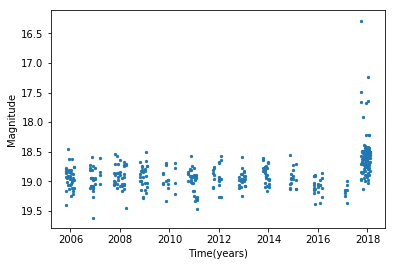

In [111]:
#Plot light curve 
plt.scatter(LC_x_list, LC_y_list, s = 5)
plt.xlabel('Time(years)')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()
plt.show()